# Projet du cours CSC8609 de machine learning.

1. Importation des Données et Analyse Exploratoire



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Installer la bibliothèque nécessaire pour lire les fichiers Excel
!pip install openpyxl

# Chemin vers votre fichier Excel dans Google Drive
file_path = '/content/drive/My Drive/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

Mounted at /content/drive


In [3]:
# Afficher le nombre de lignes et de colonnes
print(f"Taille du dataset : {data.shape} (lignes, colonnes)")

# Informations de base
print(data.info())

# Afficher les premières lignes du dataset pour vérification visuelle
print(data.head())


Taille du dataset : (768, 10) (lignes, colonnes)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  

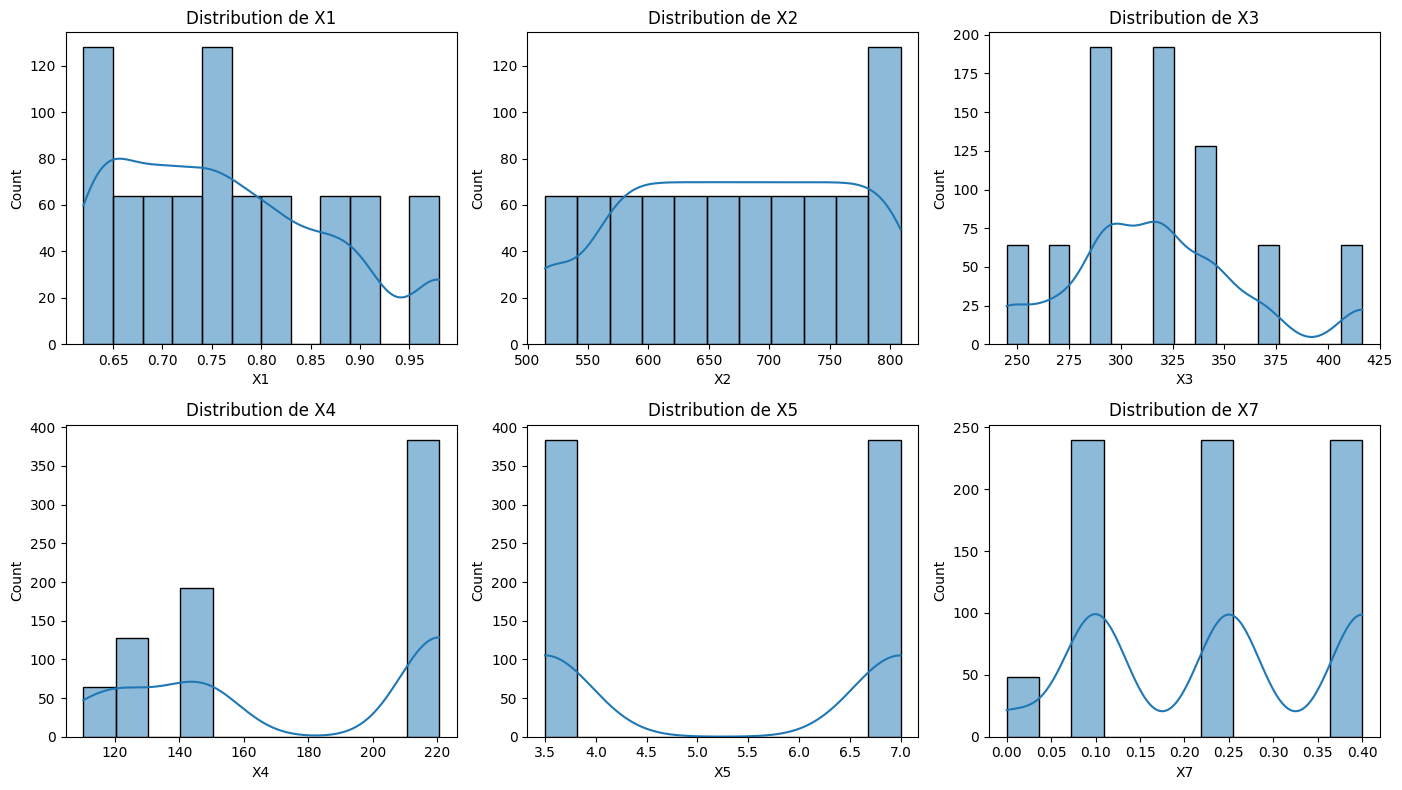

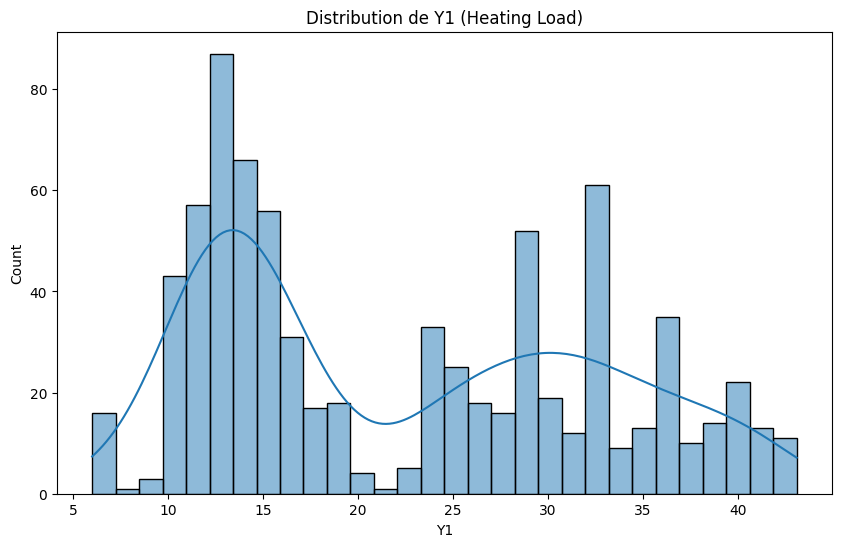

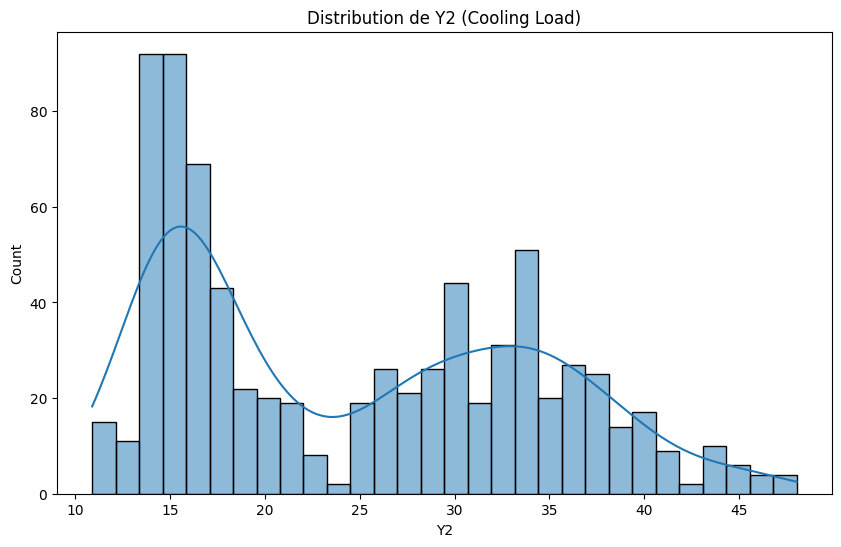

In [4]:
# Histogrammes pour les caractéristiques
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution de {feature}')
plt.tight_layout()
plt.show()

# Histogrammes pour les cibles
plt.figure(figsize=(10, 6))
sns.histplot(data['Y1'], bins=30, kde=True)
plt.title('Distribution de Y1 (Heating Load)')

plt.figure(figsize=(10, 6))
sns.histplot(data['Y2'], bins=30, kde=True)
plt.title('Distribution de Y2 (Cooling Load)')

plt.show()


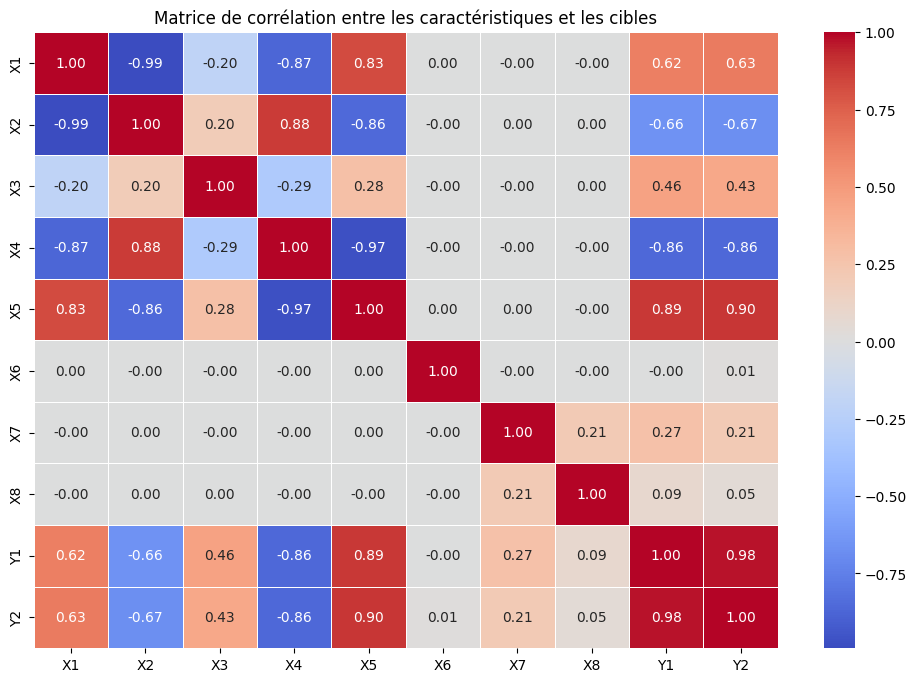

In [5]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation entre les caractéristiques et les cibles')
plt.show()


2. Nettoyage des Données

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


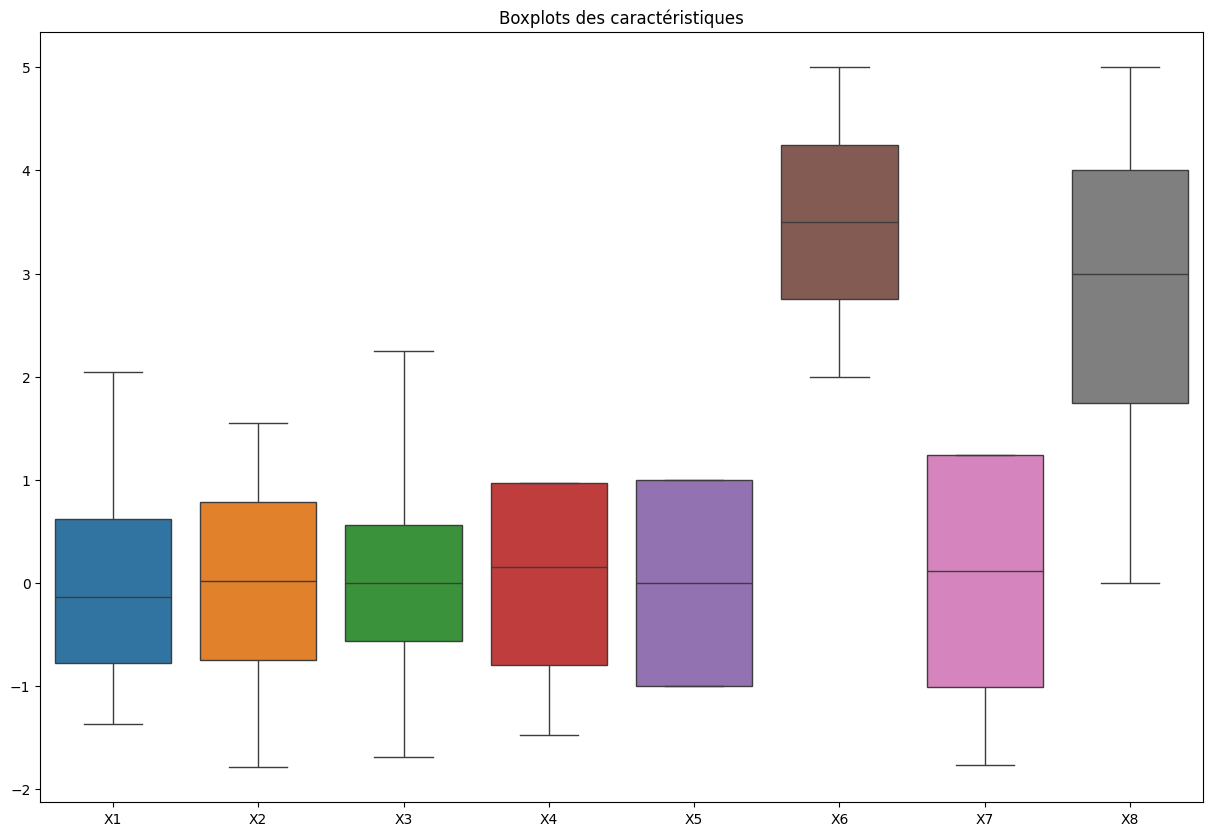

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

# Identifier les valeurs aberrantes en utilisant des boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(['Y1', 'Y2'], axis=1))
plt.title("Boxplots des caractéristiques")
plt.show()

import numpy as np

columns_with_outliers = ['X2', 'X3', 'X4']
for column in columns_with_outliers:
    data[column] = np.log1p(data[column])  # Utiliser log1p pour gérer les valeurs nulles


# Standardisation des données numériques
from sklearn.preprocessing import StandardScaler

numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])




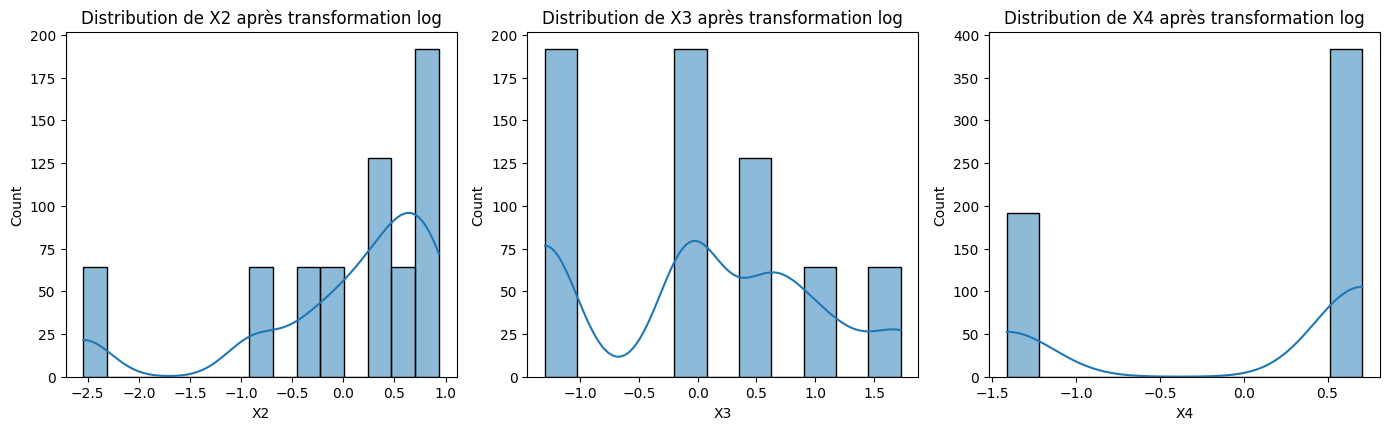

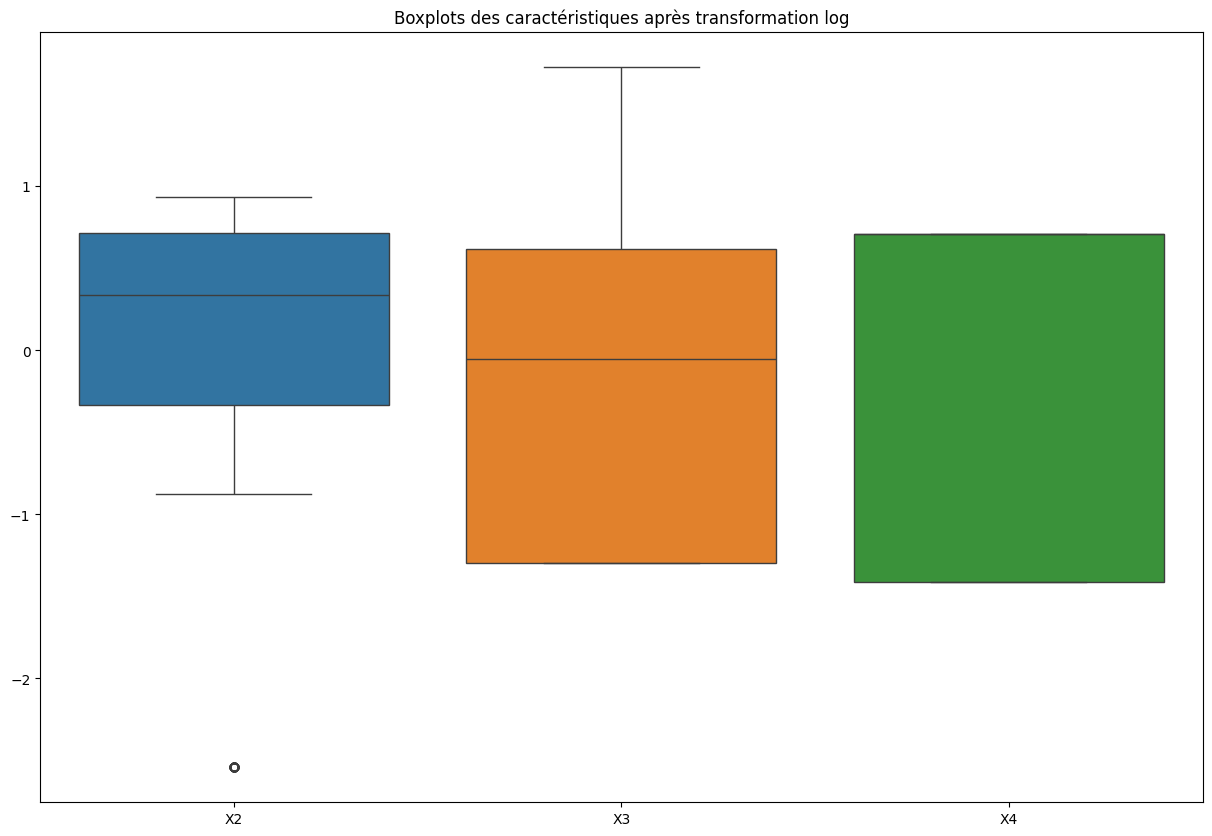

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser les distributions des caractéristiques après transformation
plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_with_outliers):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution de {column} après transformation log')

plt.tight_layout()
plt.show()

# Visualiser les boxplots après transformation
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[columns_with_outliers])
plt.title("Boxplots des caractéristiques après transformation log")
plt.show()


In [10]:
# Vérifier les valeurs uniques pour les variables catégorielles
print(data['X6'].unique())  # Orientation
print(data['X8'].unique())  # Glazing Area Distribution

[2 3 4 5]
[0 1 2 3 4 5]


In [12]:
# Identifier les lignes avec des valeurs incohérentes pour X6
inconsistent_rows_X6 = data[data['X6'] == 5]
print(f"Nombres de lignes avec X6 incohérent : {len(inconsistent_rows_X6)}")

#On remplace les valeurs incohérentes par la valeur la plus fréquente (mode)
most_frequent_value_X6 = data['X6'].mode()[0]
data.loc[data['X6'] == 5, 'X6'] = most_frequent_value_X6

# Vérification après correction
print(data['X6'].unique())

Nombres de lignes avec X6 incohérent : 192
[2 3 4]


In [13]:
# Identifier les lignes avec des valeurs incohérentes pour X8
inconsistent_rows_X8 = data[data['X8'] == 5]
print(f"Nombres de lignes avec X8 incohérent : {len(inconsistent_rows_X8)}")

# Supposons que nous remplaçons les valeurs incohérentes par la valeur la plus fréquente (mode)
most_frequent_value_X8 = data['X8'].mode()[0]
data.loc[data['X8'] == 5, 'X8'] = most_frequent_value_X8

# Vérification après correction
print(data['X8'].unique())


Nombres de lignes avec X8 incohérent : 144
[0 1 2 3 4]


3. Ingénierie des Caractéristiques



code pour Estimer l'Importance des Caractéristiques


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Prétraitement des données
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Séparer les caractéristiques et les cibles
X = data.drop(['Y1', 'Y2'], axis=1)
y1 = data['Y1']  # Heating Load

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle RandomForest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Estimer l'importance des caractéristiques
importances_rf = rf_model.feature_importances_

# Créer un DataFrame pour afficher les résultats
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

print("Importance des caractéristiques selon la Forêt Aléatoire :")
print(feature_importances_df)


Importance des caractéristiques selon la Forêt Aléatoire :
  Feature  Importance
0      X1    0.386277
3      X4    0.212700
1      X2    0.198791
6      X7    0.079035
4      X5    0.071684
2      X3    0.038401
7      X8    0.012455
5      X6    0.000656


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger les données
file_path = '/content/drive/My Drive/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Standardisation des caractéristiques numériques
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Séparer les caractéristiques et les cibles
X = data[['X1', 'X2', 'X4', 'X5']]  # Utilisation des caractéristiques importantes identifiées
y = data['Y1']  # Heating Load

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de base
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Performance du modèle de base
print("Performance du modèle de base :")
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')


Performance du modèle de base :
MSE: 15.68625772437703
MAE: 2.975568317225245
R²: 0.8495069064175347


In [25]:
# Création de nouvelles caractéristiques
data['X1_X2'] = data['X1'] * data['X2']
data['X3_X4'] = data['X3'] * data['X4']
data['X5_X7'] = data['X5'] * data['X7']

# Séparer les nouvelles caractéristiques et les cibles
X_new = data[['X1', 'X2', 'X4', 'X5', 'X1_X2', 'X3_X4', 'X5_X7']]  # Ajout des nouvelles caractéristiques

# Diviser les données en ensembles d'entraînement et de test avec les nouvelles caractéristiques
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entraîner le modèle avec les nouvelles caractéristiques
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

# Performance après ajout de nouvelles caractéristiques
print("Performance après ajout de nouvelles caractéristiques :")
print(f'MSE: {mean_squared_error(y_test_new, y_pred_new)}')
print(f'MAE: {mean_absolute_error(y_test_new, y_pred_new)}')
print(f'R²: {r2_score(y_test_new, y_pred_new)}')


Performance après ajout de nouvelles caractéristiques :
MSE: 14.345226644649372
MAE: 2.9333862706164373
R²: 0.8623726848157067


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding des variables catégoriques
data_encoded = pd.get_dummies(data, columns=['X6', 'X8'], drop_first=True)
# Convertir les colonnes booléennes en 0 et 1
data_encoded = data_encoded.astype({col: int for col in data_encoded.columns if data_encoded[col].dtype == 'bool'})

# Afficher les premières lignes pour vérifier l'encodage
print(data_encoded.head())
# Examiner les colonnes après encodage
print(data_encoded.columns)



         X1        X2        X3        X4   X5        X7     Y1     Y2  \
0  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.760447  15.55  21.33   
1  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.760447  15.55  21.33   
2  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.760447  15.55  21.33   
3  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.760447  15.55  21.33   
4  1.284979 -1.229239  0.000000 -1.198678  1.0 -1.760447  20.84  28.28   

      X1_X2     X3_X4     X5_X7  X6_3  X6_4  X6_5  X8_1  X8_2  X8_3  X8_4  \
0 -3.646358  0.826112 -1.760447     0     0     0     0     0     0     0   
1 -3.646358  0.826112 -1.760447     1     0     0     0     0     0     0   
2 -3.646358  0.826112 -1.760447     0     1     0     0     0     0     0   
3 -3.646358  0.826112 -1.760447     0     0     1     0     0     0     0   
4 -1.579546 -0.000000 -1.760447     0     0     0     0     0     0     0   

   X8_5  
0     0  
1     0  
2     0  
3     0  
4     0  
Index(['X1', 'X2', 'X3', 'X4', '

4. Sélection et Entraînement des Modèles



Regression linéaire

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entraînement du modèle
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Évaluation du modèle
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Régression Linéaire - MSE: {mse_linear}, R²: {r2_linear}")


Régression Linéaire - MSE: 15.68625772437703, R²: 0.8495069064175347


Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du modèle
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MSE: 9.344262703199377, R²: 0.9103516577273645



GradientBoostingRegressor



In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Entraînement du modèle
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Évaluation du modèle
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}")


Gradient Boosting - MSE: 9.316927748938461, R²: 0.9106139077746315


SVR Support Vector Regression

In [34]:
from sklearn.svm import SVR

# Entraînement du modèle
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

# Évaluation du modèle
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regression - MSE: {mse_svr}, R²: {r2_svr}")


Support Vector Regression - MSE: 15.237636476533828, R²: 0.8538109539871362


Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

# Entraînement du modèle
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# Évaluation du modèle
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}")


Ridge Regression - MSE: 15.63135250688202, R²: 0.8500336640534112


In [36]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
# Standardiser les caractéristiques numériques
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# One-Hot Encoding des variables catégorielles
data_encoded = pd.get_dummies(data, columns=['X6', 'X8'], drop_first=True)

# Séparer les caractéristiques et les cibles
X = data_encoded.drop(['Y1', 'Y2'], axis=1)
y1 = data_encoded['Y1']  # Heating Load
y2 = data_encoded['Y2']  # Cooling Load

In [38]:
# Diviser les données pour Y1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

# Diviser les données pour Y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)


In [39]:
# Grid pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Grid pour Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Grid pour SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1]
}

# Grid pour Ridge Regression
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10]
}


Initialisation des Modèles et GridSearchCV

In [40]:
# Initialisation et GridSearchCV pour Random Forest
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Initialisation et GridSearchCV pour Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Initialisation et GridSearchCV pour SVR
svr_model = SVR()
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Initialisation et GridSearchCV pour Ridge Regression
ridge_model = Ridge()
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


:
Entraînement GridSearchCV avec les Données


In [41]:
# Entraîner GridSearchCV pour Random Forest
grid_search_rf.fit(X_train1, y_train1)
best_params_rf = grid_search_rf.best_params_
print("Meilleurs hyperparamètres pour Random Forest :", best_params_rf)

# Entraîner GridSearchCV pour Gradient Boosting
grid_search_gb.fit(X_train1, y_train1)
best_params_gb = grid_search_gb.best_params_
print("Meilleurs hyperparamètres pour Gradient Boosting :", best_params_gb)

# Entraîner GridSearchCV pour SVR
grid_search_svr.fit(X_train1, y_train1)
best_params_svr = grid_search_svr.best_params_
print("Meilleurs hyperparamètres pour SVR :", best_params_svr)

# Entraîner GridSearchCV pour Ridge Regression
grid_search_ridge.fit(X_train1, y_train1)
best_params_ridge = grid_search_ridge.best_params_
print("Meilleurs hyperparamètres pour Ridge Regression :", best_params_ridge)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Meilleurs hyperparamètres pour Random Forest : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Meilleurs hyperparamètres pour SVR : {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Meilleurs hyperparamètres pour Ridge Regression : {'alpha': 0.01}


Entrainement avec les meilleur Hyperparamètres

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle avec les meilleurs hyperparamètres
best_rf_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Entraîner le modèle
best_rf_model.fit(X_train1, y_train1)

# Prédire sur le jeu de test
y_pred_rf = best_rf_model.predict(X_test1)

# Évaluer les performances
print("Random Forest - MSE :", mean_squared_error(y_test1, y_pred_rf))
print("Random Forest - R² :", r2_score(y_test1, y_pred_rf))


Random Forest - MSE : 0.41139969636544443
Random Forest - R² : 0.9960530539474238


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

best_gb_model.fit(X_train1, y_train1)
y_pred_gb = best_gb_model.predict(X_test1)

print("Gradient Boosting - MSE :", mean_squared_error(y_test1, y_pred_gb))
print("Gradient Boosting - R² :", r2_score(y_test1, y_pred_gb))


Gradient Boosting - MSE : 0.14348045678833787
Gradient Boosting - R² : 0.9986234563915684


In [44]:
from sklearn.svm import SVR

best_svr_model = SVR(
    C=10,
    epsilon=0.1,
    kernel='rbf'
)

best_svr_model.fit(X_train1, y_train1)
y_pred_svr = best_svr_model.predict(X_test1)

print("SVR - MSE :", mean_squared_error(y_test1, y_pred_svr))
print("SVR - R² :", r2_score(y_test1, y_pred_svr))


SVR - MSE : 3.8401861027375057
SVR - R² : 0.9631574658093723


In [45]:
from sklearn.linear_model import Ridge

best_ridge_model = Ridge(alpha=0.01)

best_ridge_model.fit(X_train1, y_train1)
y_pred_ridge = best_ridge_model.predict(X_test1)

print("Ridge Regression - MSE :", mean_squared_error(y_test1, y_pred_ridge))
print("Ridge Regression - R² :", r2_score(y_test1, y_pred_ridge))


Ridge Regression - MSE : 7.328926902139845
Ridge Regression - R² : 0.9296866785231541


Utilisation  de XGBoost

In [46]:
pip install xgboost


In [59]:

import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Vérifier les versions des packages
print(f"xgboost version: {xgb.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")


xgboost version: 2.1.3
scikit-learn version: 1.6.0


In [60]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [61]:
pip install --upgrade xgboost scikit-learn


In [63]:
# Charger les données
file_path = '/content/drive/My Drive/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Standardiser les caractéristiques numériques
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# One-Hot Encoding des variables catégorielles
data_encoded = pd.get_dummies(data, columns=['X6', 'X8'], drop_first=True)

# Séparer les caractéristiques et les cibles
X = data_encoded.drop(['Y1', 'Y2'], axis=1)
y1 = data_encoded['Y1']  # Heating Load
y2 = data_encoded['Y2']  # Cooling Load


In [64]:
# Diviser les données pour Y1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

# Diviser les données pour Y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)


In [65]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [66]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)


In [70]:
# Définir les grilles d'hyperparamètres à tester
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

best_params_xgb_hl = None
best_score_hl = float('inf')

for n_estimators in param_grid_xgb['n_estimators']:
    for learning_rate in param_grid_xgb['learning_rate']:
        for max_depth in param_grid_xgb['max_depth']:
            for subsample in param_grid_xgb['subsample']:
                for colsample_bytree in param_grid_xgb['colsample_bytree']:
                    params = {
                        'objective': 'reg:squarederror',
                        'n_estimators': n_estimators,
                        'learning_rate': learning_rate,
                        'max_depth': max_depth,
                        'subsample': subsample,
                        'colsample_bytree': colsample_bytree,
                        'random_state': 42
                    }
                    # Entraîner le modèle
                    xgb_model = xgb.XGBRegressor(**params)
                    xgb_model.fit(X_train1, y_train1)
                    y_pred = xgb_model.predict(X_test1)
                    score = mean_squared_error(y_test1, y_pred)
                    if score < best_score_hl:
                        best_score_hl = score
                        best_params_xgb_hl = params

print(f"Meilleurs hyperparamètres pour XGBoost (Heating Load): {best_params_xgb_hl}")


Meilleurs hyperparamètres pour XGBoost (Heating Load): {'objective': 'reg:squarederror', 'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 1.0, 'random_state': 42}


In [71]:
best_params_xgb_cl = None
best_score_cl = float('inf')

for n_estimators in param_grid_xgb['n_estimators']:
    for learning_rate in param_grid_xgb['learning_rate']:
        for max_depth in param_grid_xgb['max_depth']:
            for subsample in param_grid_xgb['subsample']:
                for colsample_bytree in param_grid_xgb['colsample_bytree']:
                    params = {
                        'objective': 'reg:squarederror',
                        'n_estimators': n_estimators,
                        'learning_rate': learning_rate,
                        'max_depth': max_depth,
                        'subsample': subsample,
                        'colsample_bytree': colsample_bytree,
                        'random_state': 42
                    }
                    # Entraîner le modèle
                    xgb_model = xgb.XGBRegressor(**params)
                    xgb_model.fit(X_train2, y_train2)
                    y_pred = xgb_model.predict(X_test2)
                    score = mean_squared_error(y_test2, y_pred)
                    if score < best_score_cl:
                        best_score_cl = score
                        best_params_xgb_cl = params

print(f"Meilleurs hyperparamètres pour XGBoost (Cooling Load): {best_params_xgb_cl}")


Meilleurs hyperparamètres pour XGBoost (Cooling Load): {'objective': 'reg:squarederror', 'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 0.8, 'random_state': 42}


In [72]:
# Entraîner le modèle avec les meilleurs hyperparamètres pour Heating Load
best_xgb_model_hl = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=1.0,
    random_state=42
)

best_xgb_model_hl.fit(X_train1, y_train1)

# Prédire sur le jeu de test
y_pred_hl = best_xgb_model_hl.predict(X_test1)

# Évaluer les performances
mse_hl = mean_squared_error(y_test1, y_pred_hl)
r2_hl = r2_score(y_test1, y_pred_hl)

print(f"XGBoost (Heating Load) - MSE: {mse_hl}, R²: {r2_hl}")


XGBoost (Heating Load) - MSE: 0.10925327247417041, R²: 0.9989518301147702


In [73]:
# Entraîner le modèle avec les meilleurs hyperparamètres pour Cooling Load
best_xgb_model_cl = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

best_xgb_model_cl.fit(X_train2, y_train2)

# Prédire sur le jeu de test
y_pred_cl = best_xgb_model_cl.predict(X_test2)

# Évaluer les performances
mse_cl = mean_squared_error(y_test2, y_pred_cl)
r2_cl = r2_score(y_test2, y_pred_cl)

print(f"XGBoost (Cooling Load) - MSE: {mse_cl}, R²: {r2_cl}")


XGBoost (Cooling Load) - MSE: 1.1853345327190687, R²: 0.9872073183603699


5. Évaluation



In [75]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Configuration et paramètres de l'entraînement XGBoost pour Heating Load
dtrain_hl = xgb.DMatrix(X_train1, label=y_train1)
dtest_hl = xgb.DMatrix(X_test1, label=y_test1)
params_hl = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'seed': 42
}

# Validation croisée sur Heating Load
cv_results_hl = xgb.cv(
    dtrain=dtrain_hl,
    params=params_hl,
    nfold=5,
    num_boost_round=300,
    metrics='rmse',
    as_pandas=True,
    seed=42
)

print("Validation croisée - XGBoost (Heating Load) - RMSE :")
print(cv_results_hl.tail(1))

# Entraîner le modèle sur Heating Load
final_model_hl = xgb.train(params=params_hl, dtrain=dtrain_hl, num_boost_round=300)
y_pred_hl = final_model_hl.predict(dtest_hl)
mse_hl = mean_squared_error(y_test1, y_pred_hl)
r2_hl = r2_score(y_test1, y_pred_hl)
print(f"XGBoost (Heating Load) - MSE: {mse_hl}, R²: {r2_hl}")


Validation croisée - XGBoost (Heating Load) - RMSE :
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
299         0.093944        0.003296        0.402432       0.046611
XGBoost (Heating Load) - MSE: 0.10925327247417041, R²: 0.9989518301147702


Test d'ablation

In [76]:
# Initialisation du modèle XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Conversion en DMatrix pour XGBoost
dtrain_hl = xgb.DMatrix(X_train1, label=y_train1)
dtest_hl = xgb.DMatrix(X_test1, label=y_test1)
params_hl = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'seed': 42
}

# Entraînement du modèle complet
initial_model_hl = xgb.train(params=params_hl, dtrain=dtrain_hl, num_boost_round=300)
y_pred_hl_initial = initial_model_hl.predict(dtest_hl)

# Calcul des performances
mse_hl_initial = mean_squared_error(y_test1, y_pred_hl_initial)
r2_hl_initial = r2_score(y_test1, y_pred_hl_initial)

print(f"Modèle Complet (Heating Load) - MSE: {mse_hl_initial}, R²: {r2_hl_initial}")


Modèle Complet (Heating Load) - MSE: 0.10925327247417041, R²: 0.9989518301147702


In [77]:
# Suppression de X1 et réentraîner le modèle
X_train_ablated = X_train1.drop(columns=['X1'])
X_test_ablated = X_test1.drop(columns=['X1'])

# Conversion en DMatrix
dtrain_hl_ablated = xgb.DMatrix(X_train_ablated, label=y_train1)
dtest_hl_ablated = xgb.DMatrix(X_test_ablated, label=y_test1)

# Entraînement du modèle sans X1
model_ablation_X1 = xgb.train(params=params_hl, dtrain=dtrain_hl_ablated, num_boost_round=300)
y_pred_hl_ablation_X1 = model_ablation_X1.predict(dtest_hl_ablated)

# Calcul des performances
mse_hl_ablation_X1 = mean_squared_error(y_test1, y_pred_hl_ablation_X1)
r2_hl_ablation_X1 = r2_score(y_test1, y_pred_hl_ablation_X1)

print(f"Ablation de X1 (Heating Load) - MSE: {mse_hl_ablation_X1}, R²: {r2_hl_ablation_X1}")


Ablation de X1 (Heating Load) - MSE: 0.108617975949185, R²: 0.9989579251146782


Visualisations erreurs

In [80]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger les données
file_path = '/content/drive/My Drive/ENB2012_data.xlsx'

data = pd.read_excel(file_path)

# Standardiser les caractéristiques numériques
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# One-Hot Encoding des variables catégorielles
data_encoded = pd.get_dummies(data, columns=['X6', 'X8'], drop_first=True)

# Séparer les caractéristiques et les cibles
X = data_encoded.drop(['Y1', 'Y2'], axis=1)
y1 = data_encoded['Y1']  # Heating Load
y2 = data_encoded['Y2']  # Cooling Load

# Diviser les données pour Y1 (Heating Load)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
# Diviser les données pour Y2 (Cooling Load)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Paramètres optimaux pour Heating Load
params_hl = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'seed': 42
}

# Paramètres optimaux pour Cooling Load
params_cl = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Conversion en DMatrix pour XGBoost
dtrain_hl = xgb.DMatrix(data=X_train1, label=y_train1)
dtrain_cl = xgb.DMatrix(data=X_train2, label=y_train2)


In [81]:
# Entraînement du modèle pour Heating Load
best_xgb_model_hl = xgb.train(params=params_hl, dtrain=dtrain_hl, num_boost_round=300)

# Entraînement du modèle pour Cooling Load
best_xgb_model_cl = xgb.train(params=params_cl, dtrain=dtrain_cl, num_boost_round=300)


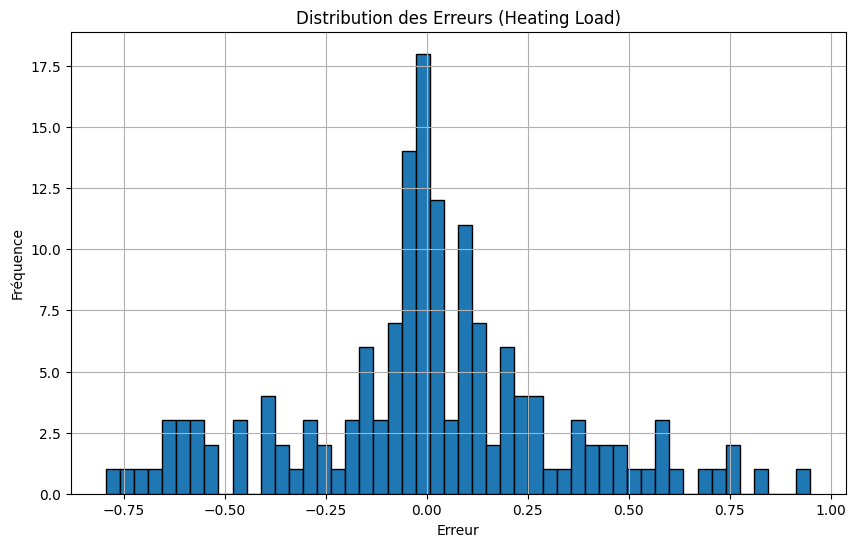

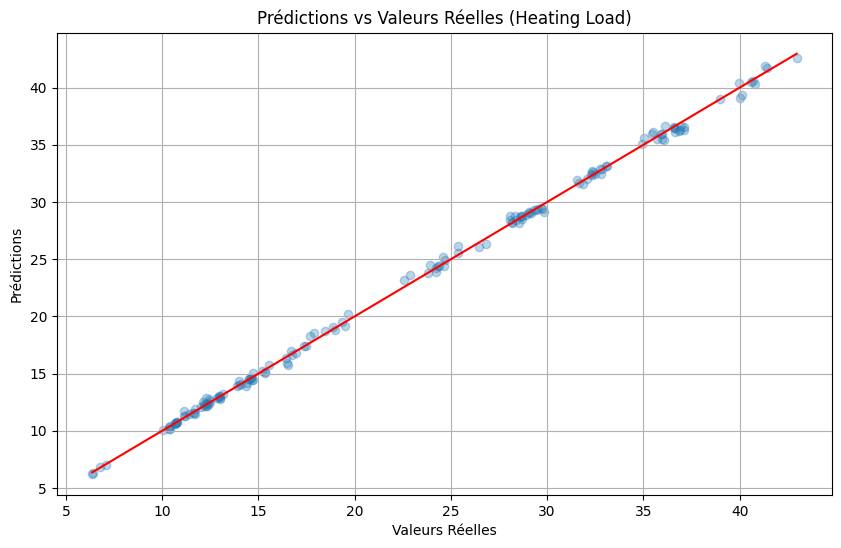

In [82]:
# Prédictions sur le jeu de test pour Heating Load
y_pred_hl = best_xgb_model_hl.predict(xgb.DMatrix(X_test1))

# Calcul des erreurs pour Heating Load
errors_hl = y_test1 - y_pred_hl

# Visualisation des erreurs
plt.figure(figsize=(10, 6))
plt.hist(errors_hl, bins=50, edgecolor='k')
plt.title('Distribution des Erreurs (Heating Load)')
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# Visualiser les prédictions vs valeurs réelles pour Heating Load
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred_hl, alpha=0.3)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red')
plt.title('Prédictions vs Valeurs Réelles (Heating Load)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.grid(True)
plt.show()


In [84]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modèle Aléatoire (Dummy Regressor) avec stratégie 'mean'
random_model = DummyRegressor(strategy='mean')
random_model.fit(X_train1, y_train1)
y_pred_random = random_model.predict(X_test1)

# Calcul des performances du modèle aléatoire
mse_random = mean_squared_error(y_test1, y_pred_random)
r2_random = r2_score(y_test1, y_pred_random)

print(f"Random Model (mean strategy) - MSE: {mse_random}, R²: {r2_random}")


Random Model (mean strategy) - MSE: 104.8082437191117, R²: -0.0055245239100216725
